<a href="https://colab.research.google.com/github/italomarcelogit/python-dicas-pandas/blob/main/Notebook_Dicas_Pandas_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comandos e dicas de Pandas para manipular dataframes em python**
DataFrame é uma estrutura parecida com uma matriz, sendo que suas colunas ou linhas podem receber seus nomes e conter dados com tipos diferentes.
Fazendo uma analogia bem simples, imagine uma planilha onde cada linha equivale a um registro e cada coluna, seus atributos. Mas acredite, um DataFrame pode ser muito mais do que somente um ***Tidy Data*** ou matriz de dados.

O objetivo deste notebook é somente compartilhar com vocês, comandos muito úteis e populares no dia a dia de uma analista de dados.

Aqui você encontrará tudo sobre o Pandas http://pandas.pydata.org**, não somente sobre DataFrame mas Series e outros ricos recursos que o Pandas pode nos proporcionar.

# **Importar o pandas**

Para utilizar o pandas no python, primeiramente temos que importar a biblioteca no python

In [1]:
# importando a lib do Pandas
import pandas as pd

# **Criar um dataframe**

Podemos criar um dataframe de várias maneiras, de acordo com a necessidade e criativade do desenvolvedor. De forma simples, vamos construí-lo manualmente conforme os exemplos abaixo:

## .DataFrame()

**Manualmente**

In [2]:
# diretamente
df = pd.DataFrame(
    {
     "Coluna 1": [1, 2, 3, 4, 5], 
     "Coluna 2": ['A', 'B', 'C','D', 'E']
    }
)
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


In [3]:
# primeiro foi criado um dicionario
# depois na criação do dataframe, foi passado o dicionário como parâmetro
dicionario = {
     "Coluna 1": [1, 2, 3, 4, 5], 
     "Coluna 2": ['A', 'B', 'C','D', 'E']   
}
df = pd.DataFrame(dicionario)
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


In [4]:
# e uma outra maneira é criar o dataframe vazio
# e ir adicionando colunas e seus valores
df = pd.DataFrame()
df['Coluna 1'] = range(1, 6) # array de 1 a 5
df['Coluna 2'] = list('ABCDE') # array de A a E
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


**Inserir uma nova linha no dataframe**

In [5]:
df = df.append({'Coluna 1': 6, 'Coluna 2': "f"}, ignore_index=True)
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,f


**Alterar uma linha**

In [6]:
# vamos alterar o valor da linha 5 e Coluna 2, de f para F
df.loc[5, 'Coluna 2'] = 'F'
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,F


**Excluir linha ou coluna**

In [7]:
# exibindo o dataframe
df 

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,F


In [8]:
# excluir a linha com índice 4 [5, E]
df = df.drop(df.index[4])
df

,Coluna 1,Coluna 2
0,1,A
1,2,B
2,3,C
3,4,D
5,6,F


In [9]:
# excluir coluna
df = df.drop(columns="Coluna 2")
df

,Coluna 1
0,1
1,2
2,3
3,4
5,6


**Excluir definitivamente o dataframe**

In [10]:
del(df)

## Funções de carga de dados - .read_csv() e outras

Podemos também criá-lo a partir de uma fonte de dados. Existem diversas fontes podendo ser SQL Server, MongoDB, Azure Database, enfim, uma vasta lista de fonte de dados. 

Como exemplo, neste notebook, vou exemplificar usando cargas (load) através de uma fonte de dados de CSV utilizando a devida função.

Mas veja abaixo que o pandas oferece uma lista com várias opções de carga .read_

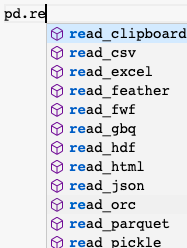



In [11]:
arquivo = 'https://raw.githubusercontent.com/italomarcelogit/python-dicas-pandas/main/datasets/mini-dataset.csv'
df = pd.read_csv(arquivo) # passamos por parametro somente o path do arquivo
                          # que pode ser uma url ou um caminho local
df

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000
5,SANDRO,M,artes,48,NaN,4000
6,VANESSA,F,artes,29,assistente,4000
7,MARCOS,M,comercial,49,executivo de contas,3000
8,CARLA,F,comercial,22,Gerente,7000
9,DANIELA,F,comercial,50,executivo de contas,3000


# **Explorar a estrutura do DataFrame com Pandas**

O nosso dataframe acima é um exemplo simples, possui poucas linhas e colunas mas imagine você analisando um log de autenticação de sua base de clientes que contém bilhões de linhas e até centenas de colunas?

Então vamos olhar para o nosso simples dataframe e vamos descobrir o que podemos fazer com as funções úteis que o Pandas nos oferece para conhecermos melhor como está estruturado o nosso dado (dataframe).

## .shape

In [12]:
# quantidade de linhas e colunas de um dataframe
df.shape

# como resultado iremos ver que nosso df tem 25 linhas e 6 colunas

(25, 6)

## .columns

In [13]:
# quais são as colunas?
df.columns

Index(['nome', 'sexo', 'setor', 'idade', 'funcao', 'salario'], dtype='object')

In [14]:
# ou retornando somente o vetor (array) com os nomes das colunas
df.columns.to_list()

['nome', 'sexo', 'setor', 'idade', 'funcao', 'salario']

## .info()

In [15]:
# mas o que realmente fazemos é logo retornar mais informações sobre o dataframe
# para isso, utilizamos a função info()
df.info()
# com ela eu sei quantas linhas, colunas e seus tipos (inteiro, datetime, object)
#, se tem valores nulos, e outras informações

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nome     25 non-null     object
 1   sexo     25 non-null     object
 2   setor    25 non-null     object
 3   idade    25 non-null     int64 
 4   funcao   22 non-null     object
 5   salario  25 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.3+ KB


# **Explorar o dataframe através dos índices e colunas**

Como disse anteriormente, na maioria das vezes, os dataframes possuem um grande volume de dados e manipular um volume grande não é interessante no momento que estamos analisando os dados contidos nele, seus tipos, seus erros, etc.

Então para conhecermos um pouco sobre os dados, utilizaremos algunas funções de manipulaçao do Pandas bastante populares.

## .head()

Para visualizar as primeiras linhas (rows) do dataframe, utilizamos a função **.head()** que, como padrão, retornará as primeiras 5 linhas. Mas podemos mudar isso passando o número de linhas como parâmetro.

In [16]:
df.head(3)

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000


## .tail()

 Visualizar as últimas 5 linhas do dataframe, mas como o .head() também podemos alterar esse número de linhas passando o parâmetro desejado.

In [17]:
df.tail() # neste caso, utilizamos o padrão

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500
22,JOANA,F,tecnologia,29,Engenheiro de Software,5000
23,KLAYTON,M,tecnologia,33,NaN,5000
24,LAURO,M,tecnologia,26,Engenheiro de Software,5000


## .sample()

Em alguns momentos queremos trazer linhas com posições aleatórias e para isso utilizaremos a função .sample(). Diferente das anteriores, o número padrão de linhas retornada é 1 mas também é possível alterar esse número.

In [18]:
df.sample(2)

,nome,sexo,setor,idade,funcao,salario
14,TEODORO,M,financeiro,38,assistente,2500
11,PETRO,M,contabilidade,18,assistente,3000


Acredito que ficou claro nos blocos acima retornados que cada linha possui a sua identificação, conhecida como índice (index). E podemos utilizá-lo para diversas situações. Darei alguns exemplos:

## **Índices**

Índices são valores que referênciam as linhas. Por exemplo, na figura abaixo as linhas possuem os índices com o valor 16 e 0

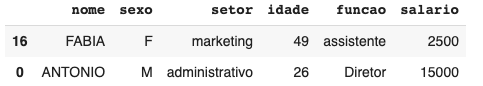

Em se tratando do dataframe df, nosso índice tem um range de 0 a 25 exclusivamente.

### .index

In [19]:
# exibir o range do meu índice, inicia com o valor 0, para no 25, incrementando 
# de 1 em um
df.index

RangeIndex(start=0, stop=25, step=1)

In [20]:
# ou eu poderia retornar um vetor com os seus valores
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [21]:
# mas vamos utilizá-lo para exibir linhas (rows) de nosso dataframe
df

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000
5,SANDRO,M,artes,48,NaN,4000
6,VANESSA,F,artes,29,assistente,4000
7,MARCOS,M,comercial,49,executivo de contas,3000
8,CARLA,F,comercial,22,Gerente,7000
9,DANIELA,F,comercial,50,executivo de contas,3000


### .iloc[]

In [22]:
# retornar o bloco de registros do dataframe que vão do início 0 até a posição 2
# utilizando a a função .iloc
df.iloc[:3] # veja, o 3 é onde ele para mas não o exibe.

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000


In [23]:
# agora iremos retornar o bloco de registros da linha 22 em diante
df.iloc[22:]

,nome,sexo,setor,idade,funcao,salario
22,JOANA,F,tecnologia,29,Engenheiro de Software,5000
23,KLAYTON,M,tecnologia,33,NaN,5000
24,LAURO,M,tecnologia,26,Engenheiro de Software,5000


In [24]:
# ou somente os registros de 5 a 9
df.iloc[5:10]

,nome,sexo,setor,idade,funcao,salario
5,SANDRO,M,artes,48,NaN,4000
6,VANESSA,F,artes,29,assistente,4000
7,MARCOS,M,comercial,49,executivo de contas,3000
8,CARLA,F,comercial,22,Gerente,7000
9,DANIELA,F,comercial,50,executivo de contas,3000


Assim como exibimos os valores pelas linhas, podemos também fazer a exibição pelas colunas. Vamos a alguns exemplos

## **Colunas**

In [25]:
# retornar somente a coluna nome
df["nome"]  
# ou df.nome maaaass cuidado, é mais recomendado utilizar o primeiro formato
# pois algumas vezes temos nome de colunas como ["Nome Completo"]

0      ANTONIO
1      GUSTAVO
2        NORMA
3     QUITERIA
4       RENATA
5       SANDRO
6      VANESSA
7       MARCOS
8        CARLA
9      DANIELA
10     EDUARDO
11       PETRO
12      OTAVIO
13     BEATRIZ
14     TEODORO
15      ZURIEL
16       FABIA
17      UBALDO
18      XAVIER
19     YOLANDA
20     HELOISA
21    ISABELLE
22       JOANA
23     KLAYTON
24       LAURO
Name: nome, dtype: object

In [26]:
# para mais colunas, utilizamos a estrutura de vetor (array)
colunas = ["nome", "sexo"]
df[colunas] # ou df[["nome", "sexo"]]

,nome,sexo
0,ANTONIO,M
1,GUSTAVO,M
2,NORMA,F
3,QUITERIA,F
4,RENATA,F
5,SANDRO,M
6,VANESSA,F
7,MARCOS,M
8,CARLA,F
9,DANIELA,F


Como também já comentei, imagine um dataframe com milhões de linhas isso exigiria uma performance melhor da sua máquina ou aplicação mas como nosso dataframe é super pequeno (shape 25, 6) isso não está afetando nosso exemplo.

Outra dica legal é você também utilizar o que já aprendemos anteriormente.

In [27]:
# bloco com nome e sexo mas somente entre os registros de 5 a 9
df.iloc[5:9][["nome", "sexo"]]

,nome,sexo
5,SANDRO,M
6,VANESSA,F
7,MARCOS,M
8,CARLA,F


**Italo, posso fazer cópias de dataframe?**
Sim pode e isso é muito comum pois algumas vezes preparamos nosso dataframe e a partir disso, podemos por executar várias tarefas e, como isso perder todo o nosso trabalho anterior. Então, antes disso fazemos uma cópia. Mas lembre-se, você fará CÓPIA, entendeu? Não? Sem problemas, eu também já perdi tempo por não me atentar a isso, então segue exemplos

In [28]:
colunas = ["nome", "salario"]
df1 = df.iloc[:5][colunas]
df1

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


In [29]:
# vamos fazer de conta que nosso df1 é o dataframe original e queremos fazer uma 
# cópia dele
df2 = df1
df2

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


In [30]:
# o df2 está igual ao df1, então vamos modificá-lo
# vamos usar um dos primeiros exemplos para atribuir valor a uma coluna
# então vou deixar todos os salários do df2 com o valor 1000
df2["salario"] = 1000
df2

,nome,salario
0,ANTONIO,1000
1,GUSTAVO,1000
2,NORMA,1000
3,QUITERIA,1000
4,RENATA,1000


In [31]:
# e vamos ver a diferença com o df1, exibindo-o novamente
df1

,nome,salario
0,ANTONIO,1000
1,GUSTAVO,1000
2,NORMA,1000
3,QUITERIA,1000
4,RENATA,1000


Viram o problema?
Nós alteramos o salário do df2 e acabou alterando também o salário do df1 e isso acontece pq quando utilizamos o = criamos apenas um ponteiro de referencia entre o df2 e o df1. Para não ter mais esse problema, o pandas oferece o **.copy**

In [32]:
# resumidamente, vamos a solução
# parte 1
colunas = ["nome", "salario"]
df1 = df.iloc[:5][colunas].copy()
# parte 2 - .copy é a solução
df2 = df1.copy()
# parte 3, alterando os valores do salario
df2['salario'] = 1000
df2

,nome,salario
0,ANTONIO,1000
1,GUSTAVO,1000
2,NORMA,1000
3,QUITERIA,1000
4,RENATA,1000


In [33]:
# e o original df1
df1

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


# **Alterar o layout do dataframe**

Existem situações onde precisamos alterar o layout do nosso dataframe para um formato onde uma ou mais colunas se tornam identificadora enquanto as outras colunas se tornam as medidas (valores).

##**.melt()**

Quando queremos transformar as linhas do dataframe em coluna, utilizamos a função .melt() mas creio que com o exemplo facilitará mais o entendimento.

In [34]:
# pra facilitar a visualização, criamos o dataframe df1 com uma cópia do df 
# contendo somente as 2 primeiras linhas e todas as suas colunas
df1 = df.iloc[:2].copy() #
df1

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000


In [35]:
df1.shape

(2, 6)

In [36]:
# agora imagine se o nosso desejo fosse o seguinte:
# a partir do df1, gere um novo dataframe com 2 colunas, onde 
# a primeira coluna será a identificação do dado (variable)
# e a segunda coluna será a media (value)
df2 = df1.melt()
df2

,variable,value
0,nome,ANTONIO
1,nome,GUSTAVO
2,sexo,M
3,sexo,M
4,setor,administrativo
5,setor,administrativo
6,idade,26
7,idade,29
8,funcao,Diretor
9,funcao,assistente


In [37]:
# uma dica: caso você deseja alterar o nome das colunas
# segue o exemplo abaixo mas lembre-se: esse vetor tem que ter a quantidade de colunas
# no nosso caso, como temos somente 2 colunas, nosso array tem somente 2 posições e seus valores
df2.columns = ["campo", "valor"]
df2

,campo,valor
0,nome,ANTONIO
1,nome,GUSTAVO
2,sexo,M
3,sexo,M
4,setor,administrativo
5,setor,administrativo
6,idade,26
7,idade,29
8,funcao,Diretor
9,funcao,assistente


## **.pivot()**

A função pivot () é usada para remodelar o dataframe organizado por determinados valores de índice / coluna. 
Esta função não suporta agregação de dados, vários valores resultarão em um MultiIndex nas colunas.
Vamos ao exemplo

In [38]:
df2 = pd.DataFrame({
    "mes": [1, 1, 2, 2],
    "nome": ["Joao", "Maria", "Joao", "Maria"],
    "vendas": [20000, 20000, 40000, 40000]
})
df2

,mes,nome,vendas
0,1,Joao,20000
1,1,Maria,20000
2,2,Joao,40000
3,2,Maria,40000


In [39]:
df2.pivot(index='mes', columns='nome', values='vendas')

nome,Joao,Maria
mes,,
1,20000,20000
2,40000,40000


## **.pivot_table()**

Temos também a função pivot_table() que é usada para criar uma tabela dinâmica no estilo planilha como um dataFrame. Os níveis da tabela dinâmica serão armazenados em objetos MultiIndex (índices hierárquicos) no índice e nas colunas do DataFrame de resultado.

In [40]:
dfTeste = pd.DataFrame({
    "uf": ["SP", "SP", "SP", "SP", "MG", "MG", "MG", "MG", "MG"],
    "cidade": ["A", "B", "B", "A", "C", "D", "D", "D", "d"],
    "produto": ["P1", "P2", "P1", "P2", "P2", "P2", "P1", "P1", "P1"],
    "quantidade": [1, 1, 1, 1, 1, 1, 1, 1, 1]}
)
dfTeste

,uf,cidade,produto,quantidade
0,SP,A,P1,1
1,SP,B,P2,1
2,SP,B,P1,1
3,SP,A,P2,1
4,MG,C,P2,1
5,MG,D,P2,1
6,MG,D,P1,1
7,MG,D,P1,1
8,MG,d,P1,1


In [41]:
dfTeste.pivot_table(values="quantidade", index=["uf", "cidade"], columns="produto",
                    aggfunc="sum", fill_value=0)

produto    P1  P2
uf cidade        
MG C        0   1
   D        2   1
   d        1   0
SP A        1   1
   B        1   1

## **.drop()**



# **Concatenar e combinar dataframes**

## **concat([df1, df2]**

Outro recurso que utilizamos bastante é concatenar dois dataframes. A função que iremos utilizar é a **.concat()**. Vamos a alguns exemplos.

In [42]:
# Vamos concatenar 2 dataframes, como exemplo, o df1 terá os registros com 
# índice de 0 a 4 e o df2 de 5 a 7
df1 = df[:5][["nome", "salario"]].copy()
df2 = df[5:8][["nome", "salario"]].copy()
df1

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000


In [43]:
df2

,nome,salario
5,SANDRO,4000
6,VANESSA,4000
7,MARCOS,3000


In [44]:
# e aqui iremos exibir a concatenação utilizando o pd.concat([dataframes])
pd.concat([df1, df2]) # lembrando que aqui o resultado poderia ser atribuido
                      # a uma variável

,nome,salario
0,ANTONIO,15000
1,GUSTAVO,3000
2,NORMA,3000
3,QUITERIA,6000
4,RENATA,5000
5,SANDRO,4000
6,VANESSA,4000
7,MARCOS,3000


In [45]:
# e mais um exemplo do concat, 2 dataframes sendo que o primeiro eu tenho somente as 
# colunas nome e salario e no segundo, eu tenho somente a coluna setor
# assim concatenamos os dois dataframes, mas o segundo será adicionado como coluna
df1 = df[:5][["nome", "salario"]].copy()
df2 = df[:5][["setor"]].copy()
pd.concat([df1, df2], axis=1)

,nome,salario,setor
0,ANTONIO,15000,administrativo
1,GUSTAVO,3000,administrativo
2,NORMA,3000,administrativo
3,QUITERIA,6000,artes
4,RENATA,5000,artes


## **.merge(df1, df2)**

Esta função combina dataframes também mas baseada em dados comuns.
Vamos ao exemplo

In [46]:
# vamos criar um dataframe com nome, setor e idade de pessoas assistentes
assistentes = df.query("funcao == 'assistente'")[['nome', 'setor', 'idade']].copy()
assistentes

,nome,setor,idade
1,GUSTAVO,administrativo,29
2,NORMA,administrativo,49
3,QUITERIA,artes,39
4,RENATA,artes,39
6,VANESSA,artes,29
11,PETRO,contabilidade,18
12,OTAVIO,contabilidade,47
13,BEATRIZ,financeiro,33
14,TEODORO,financeiro,38
16,FABIA,marketing,49


In [47]:
# vamos imaginar que temos esse outro dataframe
dfTeste = pd.DataFrame({
    "nome": ["RENATA", "VANESSA", "FABIA", "JOAO DA SILVA"],
    "setor": ["artes", "artes", "marketing", "engenharia"]
})
dfTeste

,nome,setor
0,RENATA,artes
1,VANESSA,artes
2,FABIA,marketing
3,JOAO DA SILVA,engenharia


In [48]:
# agora vamos fazer o merge entre os 2 dataframes artes e dfTeste
merge1 = pd.merge(assistentes, dfTeste)
merge1
# o pandas combina os 2 dataframes, mas como não definimos com qual coluna ele 
# irá fazer o merge, por default ele usou a coluna da esquerda, no caso NOME

,nome,setor,idade
0,RENATA,artes,39
1,VANESSA,artes,29
2,FABIA,marketing,49


In [49]:
# vamos então fazer o merge pela direita
merge2 = pd.merge(assistentes, dfTeste, how='right')
merge2
# aqui vemos o JOAO DA SILVA apareceu pq fizemos pela coluna da direita (setor)
# mas como JOAO DA SILVA não existe no dataframe assistentes, a idade dele é nua

,nome,setor,idade
0,RENATA,artes,39.0
1,VANESSA,artes,29.0
2,FABIA,marketing,49.0
3,JOAO DA SILVA,engenharia,NaN


# **Selecionar dados do dataframe**

Vamos agora utilizar algumas funções do Pandas que facilitam bastante na hora de filtrar. Usaremos o padrão pandas de consulta e também o formato query bem conhecido pelos usuários de banco de dados.

## exibir todo o dataframe

In [50]:
df

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000
5,SANDRO,M,artes,48,NaN,4000
6,VANESSA,F,artes,29,assistente,4000
7,MARCOS,M,comercial,49,executivo de contas,3000
8,CARLA,F,comercial,22,Gerente,7000
9,DANIELA,F,comercial,50,executivo de contas,3000


## filtrar dataframe

### indexação booleana

In [51]:
# listar somente pessoas que tenham a idade menor que 20
df[df['idade'] < 20]

,nome,sexo,setor,idade,funcao,salario
11,PETRO,M,contabilidade,18,assistente,3000


In [52]:
# listar pessoas da tecnologia que tem o salário maior que 5000
df[(df['setor'] == 'tecnologia') & (df['salario'] > 5000)]

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500


In [53]:
# listar somente o nome e o salário das pessoas da tecnologia que tem o salário maior que 5000
resultado = ['nome', 'salario']
df[(df['setor'] == 'tecnologia') & (df['salario'] > 5000)][resultado]

,nome,salario
20,HELOISA,10000
21,ISABELLE,7500


### .query()

In [54]:
# ou no formato query
df.query("idade < 20")

,nome,sexo,setor,idade,funcao,salario
11,PETRO,M,contabilidade,18,assistente,3000


In [55]:
df.query("setor == 'tecnologia' and salario > 5000")

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500


In [56]:
resultado = ['nome', 'salario']
df.query("setor == 'tecnologia' and salario > 5000")[resultado]

,nome,salario
20,HELOISA,10000
21,ISABELLE,7500


## .unique()

In [57]:
# exibir todas as cargos (coluna funcao), de forma única, do dataframe df
cargosUnicos = df['funcao'].unique()
cargosUnicos

array(['Diretor', 'assistente', nan, 'executivo de contas', 'Gerente ',
       'Coordenador', 'Engenheiro de Software'], dtype=object)

In [58]:
# caso o interesse seja o retorno em forma de lista, usamos o .tolist()
cargosUnicos.tolist()

['Diretor',
 'assistente',
 nan,
 'executivo de contas',
 'Gerente ',
 'Coordenador',
 'Engenheiro de Software']

## operações e estatísticas

Não vamos explicar aqui detalhamente os operadores básicos como:

*   soma, subtração, multiplicação e divisão
*   +=, =, ==, >, <=, etc
*   in, not in
*   and, or, &, |, etc

O Pandas oferece funções que realmente facilitam o nosso trabalho. Imagine situações onde precisamos somar todos os valores de uma coluna, ou simplesmente contar a quantidade, calcular a mediana, frequência.
É isso que veremos agora...

### .sum()

In [59]:
# Somar todos os valores da coluna saláriodo dataframe df
df['salario'].sum()

113500

### .count()

In [60]:
# contar a quantidade de salários no dataframe
df['salario'].count()

25

In [61]:
# ou poderíamos até utilizarmos recursos pra melhorar nossa resposta
f"O total de salários pago aos {df['salario'].count()} funcionários é de ${df['salario'].sum()}"

'O total de salários pago aos 25 funcionários é de $113500'

### value_counts()

In [62]:
# Contar quantos registros tem cada setor do dataframe
df['setor'].value_counts()

tecnologia        5
artes             4
comercial         4
marketing         4
administrativo    3
financeiro        3
contabilidade     2
Name: setor, dtype: int64

### max() e min()

In [63]:
# Maior salário
df['salario'].max()

15000

In [64]:
# idade do funcionário mais novo
df['idade'].min()

18

### mean() e median()

In [65]:
# Visualizando os dados do setor de tecnologia:
df.query(f"setor == 'tecnologia'")

,nome,sexo,setor,idade,funcao,salario
20,HELOISA,F,tecnologia,43,Gerente,10000
21,ISABELLE,F,tecnologia,28,Coordenador,7500
22,JOANA,F,tecnologia,29,Engenheiro de Software,5000
23,KLAYTON,M,tecnologia,33,NaN,5000
24,LAURO,M,tecnologia,26,Engenheiro de Software,5000


In [66]:
# Média salarial da equipe de tecnologia
df[df['setor']=="tecnologia"]["salario"].mean()

6500.0

In [67]:
# Calcular a mediana salarial da equipe de tecnologia
df[df['setor']=="tecnologia"]["salario"].median()

5000.0

### describe()

Esta função exibe, de forma simples, estatísticas descritivas das variáveis: a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo. Quando o valor é categórico (não numérico), nem todas as informações acimas poderão ser exibidas por simplesmente não possuir valores numéricos.

In [68]:
df.describe()
# veja abaixo que ele retornou somente de 2 colunas pois somente elas são numéricas

,idade,salario
count,25.000000,25.000000
mean,35.200000,4540.000000
std,10.202124,2875.615876
min,18.000000,2500.000000
25%,28.000000,3000.000000
50%,33.000000,3000.000000
75%,47.000000,5000.000000
max,50.000000,15000.000000


In [69]:
# aqui eu forcei a função describe trazer dados estatísticos das colunas não numéricas
df.describe(exclude='number')

,nome,sexo,setor,funcao
count,25,25,25,22
unique,25,2,7,6
top,UBALDO,M,tecnologia,assistente
freq,1,13,5,12


In [70]:
# ou somente de uma coluna
df['funcao'].describe()
# existem 22 itens, sendo 6 únicos, o valor mais frequente é "assistente" (12x)


count             22
unique             6
top       assistente
freq              12
Name: funcao, dtype: object

Acredito que vocês notaram que a coluna **função** retornou somente 22 linhas ao contrário das outras e o motivo é que ela contém valores nulos NaN e a função describe não retorna dados estatísticos quando há esse tipo de valor.


## .isnull()

Para listar as linhas de um dataframe que possuem valores nulos é só utilizar a função .isnull()

In [71]:
df[df['funcao'].isnull()]

,nome,sexo,setor,idade,funcao,salario
5,SANDRO,M,artes,48,NaN,4000
15,ZURIEL,M,financeiro,20,NaN,3000
23,KLAYTON,M,tecnologia,33,NaN,5000


## groupby() 
Agrupar por colunas

In [72]:
# mas e se eu quero a somatória dos salários por setor?
# novamente o pandas vai nos ajudar bastante. 
# A variavel grupo representa a coluna que será agrupada
# A variavel resultado define quais colunas sofrerão o agrupamento
grupo = 'setor'
resultado = ['setor', 'salario']
salario_setor = df[resultado].groupby(grupo).sum()
salario_setor

,salario
setor,
administrativo,21000
artes,19000
comercial,16000
contabilidade,6000
financeiro,8000
marketing,11000
tecnologia,32500


In [73]:
# podemos inclusive agrupar com mais colunas. Vamos retornar o mesmo resultado
# porém eu quero por setor e funcao
grupo = ['setor', 'funcao']
resultado = ['setor', 'funcao', 'salario']
salarios_setor_funcao = df[resultado].groupby(grupo).sum()
# somente como exemplo, adicionei .sort_values(by='salario', ascending=False) 
# abaixo, mas poderia ter sido feito na linha acima
salarios_setor_funcao

salario
setor          funcao                         
administrativo Diretor                   15000
               assistente                 6000
artes          assistente                15000
comercial      Gerente                    7000
               executivo de contas        9000
contabilidade  assistente                 6000
financeiro     assistente                 5000
marketing      Coordenador                3500
               assistente                 7500
tecnologia     Coordenador                7500
               Engenheiro de Software    10000
               Gerente                   10000

## ordenar dados

### sort_values() 

In [74]:
# para ordenar o salario de forma decrescente (do maior para o menor)
# utilizaremos a função .sort_values()
salario_setor.sort_values(by='salario', ascending=False)

,salario
setor,
tecnologia,32500
administrativo,21000
artes,19000
comercial,16000
marketing,11000
financeiro,8000
contabilidade,6000


In [75]:
salarios_setor_funcao.sort_values(by='salario', ascending=False)

salario
setor          funcao                         
administrativo Diretor                   15000
artes          assistente                15000
tecnologia     Engenheiro de Software    10000
               Gerente                   10000
comercial      executivo de contas        9000
marketing      assistente                 7500
tecnologia     Coordenador                7500
comercial      Gerente                    7000
administrativo assistente                 6000
contabilidade  assistente                 6000
financeiro     assistente                 5000
marketing      Coordenador                3500

### nlargest()

In [76]:
# abaixo, segue a função .nlargest(qtde-de-linhas, coluna) p/ ordenar de forma 
# descendente. Usei a funçao len(objeto) para pegar o total de linhas do dataframe
salarios_setor_funcao.nlargest(len(salarios_setor_funcao), columns='salario')

salario
setor          funcao                         
administrativo Diretor                   15000
artes          assistente                15000
tecnologia     Engenheiro de Software    10000
               Gerente                   10000
comercial      executivo de contas        9000
marketing      assistente                 7500
tecnologia     Coordenador                7500
comercial      Gerente                    7000
administrativo assistente                 6000
contabilidade  assistente                 6000
financeiro     assistente                 5000
marketing      Coordenador                3500

### nsmallest()

In [77]:
# abaixo, segue função .nsmallest p/ ordenar de forma ascendente
# abaixo, estou retornando os 5 menores valores
salarios_setor_funcao.nsmallest(5, columns='salario')

,,salario
setor,funcao,
marketing,Coordenador,3500
financeiro,assistente,5000
administrativo,assistente,6000
contabilidade,assistente,6000
comercial,Gerente,7000


# **Editar valores**
Na maioria das vezes é tarefa do analista melhorar o dado de várias maneiras como remover valores nulos, editar e padronizar valores, efetuar algumas limpezas nos dados. Então, vamos a alguns exemplos

In [78]:
# vamos fazer uma cópia do dataframe df original
dfCopia = df.copy()

In [79]:
dfCopia.head()

,nome,sexo,setor,idade,funcao,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000


### .rename()

In [80]:
# vamos alterar o nome da coluna funcao para cargo
dfCopia.rename(columns={"funcao": "cargo"}, inplace=True)
dfCopia.head()

,nome,sexo,setor,idade,cargo,salario
0,ANTONIO,M,administrativo,26,Diretor,15000
1,GUSTAVO,M,administrativo,29,assistente,3000
2,NORMA,F,administrativo,49,assistente,3000
3,QUITERIA,F,artes,39,assistente,6000
4,RENATA,F,artes,39,assistente,5000


### .upper() ou .lower()

In [81]:
# vamos alterar a descrição dos cargos para maiúsculo, utilizando 2 funções:
# a primeira é a função lambda que consiste em atribuir valor ao objeto
# e nela usaremos função str().upper(), que converte uma string em maiúscula
# exemplo básco da função str().upper()
teste = str('Italo Costa').upper()
teste

'ITALO COSTA'

In [82]:
teste.lower()

'italo costa'

In [83]:
# mas primeiro vamos ver todas as funções 
dfCopia['cargo'].unique().tolist()
# veja abaixo não tem padrão

['Diretor',
 'assistente',
 nan,
 'executivo de contas',
 'Gerente ',
 'Coordenador',
 'Engenheiro de Software']

### .fillna() e .dropna()

Aqui vai uma dica muito útil pois na maioria das vezes o dataframe que está sendo trabalhado vem com valores nulos (ausentes) e em algumas vezes precisamos remover os registros que contém dados nulos ou substituir esses valores nulos com valores pré-definidos pelo negócio ou ciência.
Vamos aos exemplos.

In [84]:
# podemos visualizar onde temos valores nulos conforme exemplo abaixo
dfCopia.isnull()
# mas imagine um dataframe com milhares de linhas? Assim complica.

,nome,sexo,setor,idade,cargo,salario
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [85]:
# então podemos exibir quais campos possuem valores nulos usando a função
# isnull() + .sum() e assim terá todas as colunas do dataframe que possuem 
# valores nulos. No nosso caso, a coluna cargo
dfCopia.isnull().sum()

nome       0
sexo       0
setor      0
idade      0
cargo      3
salario    0
dtype: int64

In [86]:
# vamos visualizar esses registros que possuem a coluna cargo com valores NaN
dfCopia[dfCopia['cargo'].isnull()]

,nome,sexo,setor,idade,cargo,salario
5,SANDRO,M,artes,48,NaN,4000
15,ZURIEL,M,financeiro,20,NaN,3000
23,KLAYTON,M,tecnologia,33,NaN,5000


In [87]:
# em alguns casos, removemos os registros que possuem valores nulos
# e para isso utilizamos a função dropna()
# abaixo, não irei atribuir isso ao dfCopia, apenas simularemos a visão acima
# removendo os valores nulos
dfCopia[dfCopia['cargo'].isnull()].dropna()
# ou seja, ele não exibiu as linhas acimas 

,nome,sexo,setor,idade,cargo,salario


In [88]:
# ou outra forma de exemplo seria
dfCopia.dropna().isnull().sum()
# aqui, primeiro removeu os registros Nan e depois verificou se há alguma 
# valor nulo.

nome       0
sexo       0
setor      0
idade      0
cargo      0
salario    0
dtype: int64

In [89]:
# caso a regra é remover os registros com valores nulos
# é só atribuir o resultado a uma nova variável
novoDF = dfCopia.copy().dropna() # removi os registros
novoDF.isnull().sum() # verifiquei se realmente estão todos com valores

nome       0
sexo       0
setor      0
idade      0
cargo      0
salario    0
dtype: int64

In [90]:
# temos um valor nulo acima então vou analisar essa coluna cargo
dfCopia['cargo'].describe()

count             22
unique             6
top       assistente
freq              12
Name: cargo, dtype: object

In [91]:
# vou fazer o seguinte, para os valores nulos (nan), vou preencher com o valor 
# mais presente na tabela que é assistente
# importante reforçar: essa opção abaixo é uma regra de negócio, podendo variar
# de situação a situação
dfCopia['cargo'] = dfCopia['cargo'].fillna('assistente')

In [92]:
# agora não temos mais valores nulos na coluna cargo
dfCopia['cargo'].unique().tolist()

['Diretor',
 'assistente',
 'executivo de contas',
 'Gerente ',
 'Coordenador',
 'Engenheiro de Software']

### .apply() e lambda

A função apply() é uma das funções mais usadas para manipular dados e criar novas variáveis (colunas). Vou mostrá-la utilizando também a funçao lambda. Abaixo seguem exemplos 

In [93]:
# vamos deixar todos os cargos em letras maiúsculas
# a primeira é a função .apply() junto com a lambda que consiste em atribuir valor ao objeto
# e nela usaremos função str().upper(), que converte uma string em maiúscula
dfCopia['cargo'] = dfCopia['cargo'].apply(lambda x: str(x).upper())

In [94]:
# agora todos os cargos estão em maiúsculo
dfCopia['cargo'].unique().tolist()

['DIRETOR',
 'ASSISTENTE',
 'EXECUTIVO DE CONTAS',
 'GERENTE ',
 'COORDENADOR',
 'ENGENHEIRO DE SOFTWARE']

In [95]:
dfCopia.head(10)

,nome,sexo,setor,idade,cargo,salario
0,ANTONIO,M,administrativo,26,DIRETOR,15000
1,GUSTAVO,M,administrativo,29,ASSISTENTE,3000
2,NORMA,F,administrativo,49,ASSISTENTE,3000
3,QUITERIA,F,artes,39,ASSISTENTE,6000
4,RENATA,F,artes,39,ASSISTENTE,5000
5,SANDRO,M,artes,48,ASSISTENTE,4000
6,VANESSA,F,artes,29,ASSISTENTE,4000
7,MARCOS,M,comercial,49,EXECUTIVO DE CONTAS,3000
8,CARLA,F,comercial,22,GERENTE,7000
9,DANIELA,F,comercial,50,EXECUTIVO DE CONTAS,3000


In [96]:
# vamos fazer outro exemplo usando lambda mas com uma função criada pelo dev
dfCopia.query('salario < 3000')

,nome,sexo,setor,idade,cargo,salario
13,BEATRIZ,F,financeiro,33,ASSISTENTE,2500
14,TEODORO,M,financeiro,38,ASSISTENTE,2500
16,FABIA,F,marketing,49,ASSISTENTE,2500
17,UBALDO,M,marketing,47,ASSISTENTE,2500
19,YOLANDA,F,marketing,27,ASSISTENTE,2500


In [97]:
# função simples para reajustar um valor, no caso será o salario
def salario_reajuste(valor, reajuste):
  """
  valor = float
  reajuste = float, ex.: 10% será 0.1
  """
  if valor < 3000:
    valor += valor * reajuste
  return valor

In [98]:
# testando a função
salario_reajuste(valor=2000, reajuste=0.1) 

2200.0

In [99]:
# vamos reajustar o salário em 20% dos funcionários que recebem menos de 3000
dfCopia['salario'] = dfCopia['salario'].apply(lambda x: salario_reajuste(x, 0.2))
dfCopia.query('salario < 3000')
# veja abaixo que não existe nenhum funcionário com salario menor que 3000

,nome,sexo,setor,idade,cargo,salario


In [100]:
# por último, só pra reforçar conhecimento, vamos dar um bonus de 2800 para
# cada integrante do setor comercial
dfCopia.query("setor == 'comercial'")

,nome,sexo,setor,idade,cargo,salario
7,MARCOS,M,comercial,49,EXECUTIVO DE CONTAS,3000.0
8,CARLA,F,comercial,22,GERENTE,7000.0
9,DANIELA,F,comercial,50,EXECUTIVO DE CONTAS,3000.0
10,EDUARDO,M,comercial,34,EXECUTIVO DE CONTAS,3000.0


In [101]:
# vamos utilizar o dataframe copia inteiro
# vamos atribuir o valor no campo salario
# e vamos colocar a condicional IF na função lambda
dfCopia['salario'] = dfCopia.apply(lambda x: x['salario']+2800 if x['setor']=="comercial" else x['salario'], axis=1)

In [102]:
dfCopia.query("setor == 'comercial'")

,nome,sexo,setor,idade,cargo,salario
7,MARCOS,M,comercial,49,EXECUTIVO DE CONTAS,5800.0
8,CARLA,F,comercial,22,GERENTE,9800.0
9,DANIELA,F,comercial,50,EXECUTIVO DE CONTAS,5800.0
10,EDUARDO,M,comercial,34,EXECUTIVO DE CONTAS,5800.0


# **Matriz de correlação**

Correlação indica a interdependência entre duas ou mais variáveis, variando entre os valores 1 e -1, sendo 1 correlação positiva perfeita, 0 sem correlação e -1 negativa perfeita. 
Vamos ao exemplo abaixo onde queremos saber qual variável (coluna) se correlaciona melhor com o total de vendas.

In [103]:
# vamos simular um dataframe de vendas de produtos de 1,99
import random
meses = range(1, 13)
produtos = list('ABCDEFGHIJ') # 10 produtos A, B, C ...
vendedores = ['JOAO', 'MARIA', 'PEDRO', 'ANA', 'BETO']
vendas = pd.DataFrame(columns=['id_venda', 'mes', 'id_produto', 'id_vendedor', 
                               'qtd', 'valor', 'total'])
idv = 1
for mes in meses:
  for i in range(1, random.randint(50, 300)):
    produto = random.randint(0, len(produtos)-1)
    vendedor = random.randint(0, len(vendedores)-1)
    qtd = random.randint(1, 5)
    vendas = vendas.append({'id_venda':idv, 'mes':mes, 
                            'id_produto':produto, 'id_vendedor':vendedor, 
                            'qtd':qtd, 'valor': 1.99, 'total':qtd*1.99},
                           ignore_index=True)
    idv+=1 # incrementando

In [104]:
f"O dataframe vendas tem {vendas.shape[0]} linhas e {vendas.shape[1]} colunas"

'O dataframe vendas tem 1881 linhas e 7 colunas'

In [105]:
# vamos visualizar as 5 primeiras linhas
vendas.head()

,id_venda,mes,id_produto,id_vendedor,qtd,valor,total
0,1.0,1.0,0.0,4.0,3.0,1.99,5.97
1,2.0,1.0,7.0,4.0,3.0,1.99,5.97
2,3.0,1.0,9.0,2.0,4.0,1.99,7.96
3,4.0,1.0,2.0,3.0,3.0,1.99,5.97
4,5.0,1.0,5.0,0.0,3.0,1.99,5.97


### .corr()

In [106]:
# agora vamos visualizar a correlacao entre as variaveis
correlacao = vendas.corr().round(2)
correlacao

,id_venda,mes,id_produto,id_vendedor,qtd,valor,total
id_venda,1.00,0.99,0.05,-0.01,-0.00,0.0,-0.00
mes,0.99,1.00,0.05,-0.01,-0.01,-0.0,-0.01
id_produto,0.05,0.05,1.00,0.01,0.04,-0.0,0.04
id_vendedor,-0.01,-0.01,0.01,1.00,-0.00,-0.0,-0.00
qtd,-0.00,-0.01,0.04,-0.00,1.00,0.0,1.00
valor,0.00,-0.00,-0.00,-0.00,0.00,1.0,0.00
total,-0.00,-0.01,0.04,-0.00,1.00,0.0,1.00


### style

Veja a correlação acima entre a variável total com a mesma variável total? O valor é 1, que . Agora veja quais as variáveis que melhor se correlacionam com a variável total, exceto a própria total?


In [107]:
# podemos aplicar estilo de cor na visualizaçao da correlação
correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

,id_venda,mes,id_produto,id_vendedor,qtd,valor,total
id_venda,1.00,0.99,0.05,-0.01,-0.00,0.00,-0.00
mes,0.99,1.00,0.05,-0.01,-0.01,-0.00,-0.01
id_produto,0.05,0.05,1.00,0.01,0.04,-0.00,0.04
id_vendedor,-0.01,-0.01,0.01,1.00,-0.00,-0.00,-0.00
qtd,-0.00,-0.01,0.04,-0.00,1.00,0.00,1.00
valor,0.00,-0.00,-0.00,-0.00,0.00,1.00,0.00
total,-0.00,-0.01,0.04,-0.00,1.00,0.00,1.00


# **Visualização gráfica dos dados**

Na maioria das vezes, uma imagem ajuda explicar de forma mais fácil. Existem diversas bibliotecas no python que facilitam essa visualização mas o pandas também tem o seu recurso de plot.

## .plot()

É possível plotar (exibir gráficos) diretamente  com o Pandas. Ele possui diversos tipos de gráficos como linhas (line), barras (bar e barh), histograma, boxplot, pizza (pie) entre outros (consulte o doc do pandas)

Vou exemplificar alguns:

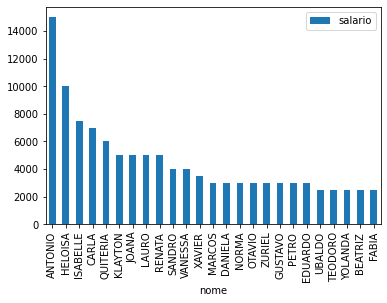

In [108]:
nome_salario = df.sort_values(by='salario', ascending=False)
nome_salario.plot.bar(x='nome', y='salario')

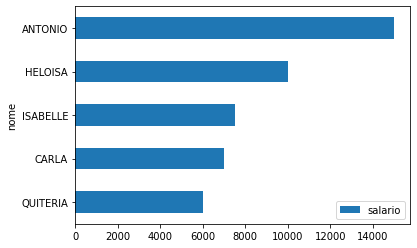

In [109]:
# top 5 salários
nome_salario[:5].sort_values(by='salario', ascending=True).plot.barh(x='nome', y='salario')

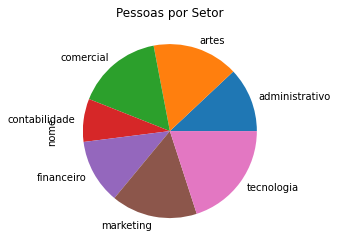

In [110]:
# representatividade das áreas no conjunto de pessoas 
df[['setor', 'nome']].groupby('setor').count().plot.pie(y='nome', 
                                                        legend=False,
                                                        title='Pessoas por Setor')

E para dar somente um gostinho de outras bibliotecas que otimisa o visual gráfico, vou exemplificar utilizando nossos dataframes com as bibliotecas **plotly** e **seaborn** para criar os gráficos. 

## plotly

In [111]:
import plotly.graph_objects as go

In [112]:
vg = vendas[['id_produto', 'total']].groupby('id_produto').sum()
vg

,total
id_produto,
0.0,1062.66
1.0,1048.73
2.0,1052.71
3.0,1012.91
4.0,1247.73
5.0,1188.03
6.0,991.02
7.0,1146.24
8.0,1154.20


In [113]:
# acima vemos os id_produto no indice do groupby
# como eles representam a descricao dos produtos, entao utilizarei o array produtos
labels = produtos 
valores = vg['total']

fig = go.Figure(data=[go.Pie(labels=labels, values=valores, hole=.3)])
fig.update_layout(title_text="Produtos mais vendidos")
fig.show()

In [114]:
# agora vamos ver o total vendido mes a mes
vg = vendas[['mes', 'total']].groupby('mes').sum()
labels = vg.index # meses 
valores = vg['total']

fig = go.Figure(data=[go.Bar(x=labels, y=valores)])
fig.update_layout(title_text="Vendas por mês", template="plotly_white")
fig.show()

## seaborn

In [115]:
import seaborn as sns

In [116]:
vg = vendas[['id_vendedor', 'total']].groupby('id_vendedor').sum()
vendedores

['JOAO', 'MARIA', 'PEDRO', 'ANA', 'BETO']

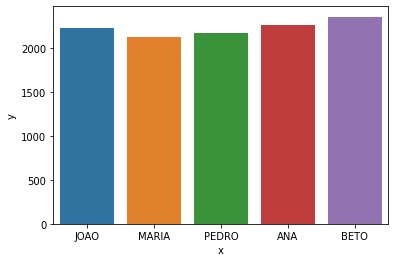

In [117]:
sns.barplot(data=pd.DataFrame({"x":vendedores, "y":vg.values.flatten()}), x="x", y="y")

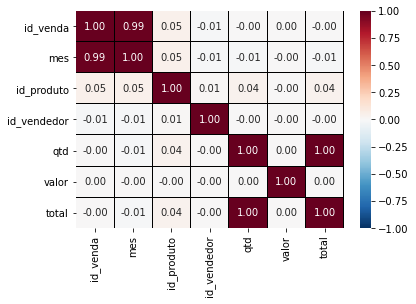

In [118]:
sns.heatmap(correlacao, annot=True, fmt='.2f', vmin=-1, vmax=1, 
            linewidth=0.01, linecolor='black', cmap='RdBu_r')